소규모 회사, 첫 개발. 2023년 이후

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [3]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

* ***Name*** : 게임의 이름입니다.

* ***Platform*** : 게임이 지원되는 플랫폼의 이름입니다.

* ***Year*** : 게임이 출시된 연도입니다.

* ***Genre*** : 게임의 장르입니다.

* ***Publisher*** : 게임을 배급한 회사입니다.

* ***NA_Sales*** : 북미지역에서의 출고량입니다.

* ***EU_Sales*** : 유럽지역에서의 출고량입니다.

* ***JP_Sales*** : 일본지역에서의 출고량입니다.

* ***Other_Sales*** : 기타지역에서의 출고량입니다.

In [4]:
#중복 값 없음.
#결측 Year : 271, Genre : 50, Publisher : 58
#연도, 장르, 퍼블리셔는 확인해보니 데이터프레임 내에서 유추할 수 없는 데이터이기에 결측치 행을 삭제
#Unnamed : 0은 인덱스 컬럼? 굳이 필요 없으니 삭제

In [70]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [69]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
print('Gen', df.Genre.unique(),'\n\nPlatform', df.Platform.unique())

Gen ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter' nan] 

Platform ['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [6]:
df_drop = df.dropna()
df_drop = df_drop.drop('Unnamed: 0', axis=1)

In [7]:
#출고량 0.n M 이 기본 단위로 보인다. -> M은 삭제하고 K는 M에 맞춰서 치환? M을 K에 맞춰서 치환?
# K == 1000
# M == 1000000
#연도가 0000.0으로 적절한 형태가 아니다 -> 형식 바꾸기

In [8]:
# 판매량 정리
df_drop[['NA_Sales', 'EU_Sales',	'JP_Sales', 'Other_Sales']] = df_drop.loc[:, 'NA_Sales':'Other_Sales'].apply(lambda str : str.replace(['M'], '', regex=True))
df_drop[['NA_Sales', 'EU_Sales',	'JP_Sales', 'Other_Sales']] = df_drop.loc[:, 'NA_Sales':'Other_Sales'].apply(lambda str : str.replace(['K'], '', regex=True))
df_drop[['NA_Sales', 'EU_Sales',	'JP_Sales', 'Other_Sales']] = df_drop[['NA_Sales', 'EU_Sales',	'JP_Sales', 'Other_Sales']].astype('float')
df_drop['NA_Sales'] = df_drop['NA_Sales'].apply(lambda x : x/1000 if x - int(x) == 0 else x)
df_drop['EU_Sales'] = df_drop['EU_Sales'].apply(lambda x : x/1000 if x - int(x) == 0 else x)
df_drop['JP_Sales'] = df_drop['JP_Sales'].apply(lambda x : x/1000 if x - int(x) == 0 else x)
df_drop['Other_Sales'] = df_drop['Other_Sales'].apply(lambda x : x/1000 if x - int(x) == 0 else x)

In [9]:
# 날짜 정리
df_drop.Year = df_drop.Year.astype('int')
df_drop.Year = df_drop.Year.apply(lambda x : x + 1900 if x < 100 and x > 50 else x + 2000 if x < 100 and x < 50 else x)

In [10]:
df_clear = df_drop.copy()

In [11]:
df_2010 = df_clear.query('Year >= 2010')

1. **지역에 따라서 선호하는 게임 장르가 다를까**
 * 지역은 어떻게 구분했나요?
   > 전처리 후 판매량의 분위수로 구분했다.
 * 지역별로 선호하는 게임의 장르를 파악했나요?
   > 전체 게임 - 북미 : 액션, 유럽 : 액션, 일본 : 롤플레잉, 기타 : 액션
   > 2010년 이후 게임 - 액션
 * 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?
   > 같은 조건으로 플랫폼을 확인 했을 때 일본만 DS가 가장 높은 수를 차지했다
   > DS는 휴대가 가능한 게임기이며, 당시 콘솔 기술론 액션에 적합하지 않았을 것이라고 판단.

   > 2010년 이후 플랫폼의 성능이 상승해 액션 게임도 가능해진것으로 판단.

  > 액션 장르 분류의 문제로 신뢰성이 높지 않다.

2. **연도별 게임의 트렌드가 있을까**
 * 트렌드는 어떤 것을 기준으로 파악했나요?
  > 장르
 * 연도별로 트렌드가 존재하나요?
  > 존재한다 -> 시각화 할것
 * 왜 존재한다/존재하지 않는다고 생각했나요?
  > 연도를 기준으로 가장 많이 나온 장르들을 봤을 때 차이가 있었기 때문.

3. **인기가 많은 게임에 대한 분석 및 시각화 프로세스**
 * 인기가 많다는 것을 어떻게 정의했나요?
  > 각 시장에서 균일하게 팔렸으며, 많이 팔린 게임
 * 해당 게임이 왜 인기가 많다고 생각했나요?
  > 각 시장에서 일정치 이상의 판매량을 가진 게임 중, 모두 평균을 넘긴 게임을 선정
 * 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?
 * 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?

4. **다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론**

다음 분기가 언제인지

회사의 규모는 어느정도인지

와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.

In [12]:
# 동일한 게임인데 다른 기종으로 발매된 경우가 있다.

In [13]:
# 지역별 판매량으로 클러스터링 하는 것이 맞는가?
# 지역 시장별로 규모의 차이가 있으나, 판별 가능한 수치는 판매량 뿐 -> 정확한 비교가 어렵다. -> 클러스터링 하기엔 좋지 않은 것 같다.

In [14]:
df_clear.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.263104,0.146087,0.077729,0.048111
std,5.832087,0.818300,0.500229,0.307715,0.189384
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [ ]:
print("\n북미\n",df_clear.query('NA_Sales >= 0.24').Genre.value_counts(), '\n', df_clear.query('NA_Sales >= 0.24').Platform.value_counts())
print("\n유럽\n",df_clear.query('EU_Sales >= 0.11').Genre.value_counts(), '\n', df_clear.query('EU_Sales >= 0.11').Platform.value_counts())
print("\n일본\n",df_clear.query('JP_Sales >= 0.04').Genre.value_counts(), '\n', df_clear.query('JP_Sales >= 0.04').Platform.value_counts())
print("\n기타\n",df_clear.query('Other_Sales >= 0.04').Genre.value_counts(), '\n', df_clear.query('Other_Sales >= 0.04').Platform.value_counts())

In [16]:
print("\n북미\n",df_2010.query('NA_Sales >= 0.18').Genre.value_counts(), '\n', df_2010.query('NA_Sales >= 0.18').Platform.value_counts())
print("\n유럽\n",df_2010.query('EU_Sales >= 0.13').Genre.value_counts(), '\n', df_2010.query('EU_Sales >= 0.13').Platform.value_counts())
print("\n일본\n",df_2010.query('JP_Sales >= 0.04').Genre.value_counts(), '\n', df_2010.query('JP_Sales >= 0.04').Platform.value_counts())
print("\n기타\n",df_2010.query('Other_Sales >= 0.04').Genre.value_counts(), '\n', df_2010.query('Other_Sales >= 0.04').Platform.value_counts())


북미
 Action          378
Shooter         195
Sports          193
Misc            138
Role-Playing    122
Racing           66
Fighting         61
Platform         60
Simulation       38
Adventure        32
Strategy         19
Puzzle           13
Name: Genre, dtype: int64 
 X360    318
PS3     303
Wii     166
PS4     108
XOne     96
DS       89
3DS      86
WiiU     60
PC       49
PSV      23
PSP      13
PS2       4
Name: Platform, dtype: int64

유럽
 Action          409
Shooter         222
Sports          168
Role-Playing    110
Misc             98
Racing           92
Platform         55
Fighting         52
Adventure        43
Simulation       39
Strategy         27
Puzzle           15
Name: Genre, dtype: int64 
 PS3     339
X360    276
PS4     142
PC      132
Wii     105
3DS      85
XOne     82
DS       54
WiiU     49
PSV      37
PSP      24
PS2       5
Name: Platform, dtype: int64

일본
 Action          424
Role-Playing    343
Adventure       123
Misc            115
Sports          106
Sho

In [ ]:
df_clear.groupby('Year').Platform.describe().Year

In [85]:
df_clear.groupby('Year').Platform.describe().index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2020],
           dtype='int64', name='Year')

In [18]:
df_clear.groupby('Year').Genre.describe()

,count,unique,top,freq
Year,,,,
1980,8,4,Misc,4
1981,46,7,Action,25
1982,36,7,Action,18
1983,17,7,Action,7
1984,14,7,Racing,3
1985,14,7,Puzzle,4
1986,21,6,Action,6
1987,16,7,Sports,4
1988,15,8,Platform,4


In [87]:
df_group = df_clear.groupby('Year').Genre.describe()

In [ ]:
plt.figure(figsize=(20,20))
plt.bar(x=df_group.index.astype('str'), height=df_group.freq, alpha=0.4, edgecolor="black")
plt.xticks(x=df_group.index, fontsize=15, rotation=90)
plt.xlabel('year', fontsize = 10)
plt.ylabel('freq', fontsize = 10)
plt.title('Genre Trends', fontsize = 20)

In [19]:
df_2010.groupby('Year').Platform.describe()

,count,unique,top,freq
Year,,,,
2010,1253,7,DS,326
2011,1133,9,PS3,216
2012,652,9,PS3,147
2013,545,11,PS3,127
2014,580,11,PS3,108
2015,611,10,PS4,136
2016,342,8,PS4,107
2017,3,2,PSV,2
2020,1,1,DS,1


In [105]:
df_2010_group = df_2010.groupby('Year').Genre.describe()

In [113]:
df_2010_group

,count,unique,top,freq
Year,,,,
2010,1253,12,Action,226
2011,1133,12,Action,239
2012,652,12,Action,263
2013,545,12,Action,148
2014,580,12,Action,186
2015,611,12,Action,253
2016,342,11,Action,118
2017,3,2,Role-Playing,2
2020,1,1,Simulation,1


Text(0.5, 1.0, 'Genre Trends after 2010')

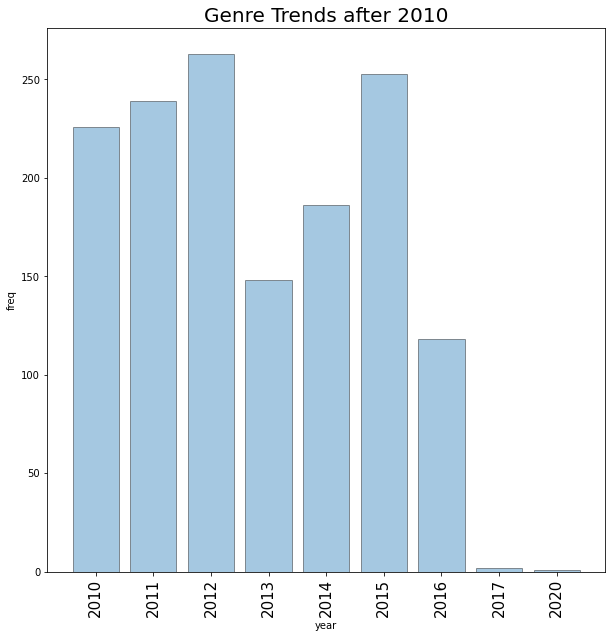

In [112]:
plt.figure(figsize=(10,10))
plt.bar(x=df_2010_group.index.astype('str'), height=df_2010_group.freq, alpha=0.4, edgecolor="black")
plt.xticks(x=df_2010_group.index, fontsize=15, rotation=90)
plt.xlabel('year', fontsize = 10)
plt.ylabel('freq', fontsize = 10)
plt.title('Genre Trends after 2010', fontsize = 20)

In [21]:
# 장르의 분별력이 부족하다. -> 대부분을 Action으로 표기.

In [23]:
# 전체 게임에서 상위 25%의 게임들을 모든 지역별 판매량 평균 이상이 되는 것만 추출
df_pop = df_clear.query('NA_Sales > 1')
df_pop = df_pop.query('EU_Sales > 1')
df_pop = df_pop.query('JP_Sales > 1')
df_pop = df_pop.query('Other_Sales > 1')
df_pop = df_pop.query('NA_Sales >= 12')
df_pop =df_pop.query('EU_Sales >= 9')
df_pop =df_pop.query('JP_Sales >= 3')
df_pop =df_pop.query('Other_Sales >= 2')

In [24]:
df_pop #전체 데이터 프레임에서 인기가 많은 게임.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31


In [25]:
df_2010 = df_clear.query('Year >= 2010')

In [26]:
df_2010.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000
mean,2012.251953,0.215295,0.161421,0.056926,0.052254
std,1.966459,0.612013,0.459117,0.217033,0.155507
min,2010.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,0.050000,0.030000,0.000000,0.010000
75%,2014.000000,0.180000,0.130000,0.040000,0.040000
max,2020.000000,14.970000,9.270000,5.650000,4.140000


In [27]:
# 2010년 이후 게임에서 상위 25%의 게임들을 모든 지역별 판매량 평균 이상이 되는 것만 추출

df_2010_pop = df_2010.query('NA_Sales > 0.18')
df_2010_pop = df_2010_pop.query('EU_Sales > 0.13')
df_2010_pop = df_2010_pop.query('JP_Sales > 0.04')
df_2010_pop = df_2010_pop.query('Other_Sales > 0.04')
df_2010_pop = df_2010_pop.query('NA_Sales >= 1')
df_2010_pop =df_2010_pop.query('EU_Sales >= 1')
df_2010_pop =df_2010_pop.query('JP_Sales >= 0.3')
df_2010_pop =df_2010_pop.query('Other_Sales >= 0.3')

In [28]:
df_2010_pop.index

Int64Index([ 2008,  2028,  3148,  3483,  4211,  4240,  4251,  5692,  6216,
             6881,  7838,  7877,  8906,  9070,  9452,  9924, 10379, 10621,
            10944, 11123, 11950, 11972, 12623, 12850, 12949, 13439, 14120,
            15678, 16515],
           dtype='int64')

In [29]:
df_2010_pop = df_2010_pop.reset_index(drop=True)

In [116]:
df_2010_pop[df_2010_pop.Name.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
23,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43


In [141]:
df_2010_pop.iloc[[0,3, 18, 23]]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02
3,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
18,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,Nintendo,2.59,1.06,0.80,0.57
23,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43


In [ ]:
plt.figure(figsize=(20,20))
plt.bar(x=df_2010_pop.index, height=df_2010_pop.NA_Sales, alpha=0.4, edgecolor="black")
plt.bar(x=df_2010_pop.index, height=df_2010_pop.EU_Sales, alpha=0.4, edgecolor="black")
plt.bar(x=df_2010_pop.index, height=df_2010_pop.JP_Sales, alpha=0.4, edgecolor="black")
plt.bar(x=df_2010_pop.index, height=df_2010_pop.Other_Sales, alpha=0.4, edgecolor="black")
plt.xticks(df_2010_pop.index, fontsize=15)
plt.xlabel('Game Index', fontsize=15)
plt.ylabel('Each Sales', fontsize=15)
plt.title('After 2010 popular games', fontsize=20)
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales',	'Other_Sales'], fontsize=20)

In [ ]:
#게임의 특징? -> 장르, 플랫폼, 연도